In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_coerece(experiment):
    folder = f"results/coerence_{experiment}"
    t = np.load(os.path.join(folder, "t.npy"))
    if experiment in ['linear1', 'linear2', 'linear3', 'linear4', 'linear5', 'linear6','exp1', 'exp2', 'exp3', 'exp4', 'exp5', 'exp6']:
        list = np.load(os.path.join(folder, "w_list.npy"))
    elif experiment in ['gauss1', 'gauss2', 'gauss4','gauss5']:
        list = np.load(os.path.join(folder, "ep_list.npy")) 
    elif experiment in ['gauss3','gauss6']:
        list = np.load(os.path.join(folder, "T_list.npy")) 
    var_aberto = np.load(os.path.join(folder, "var_aberto.npy"), allow_pickle=True)
    const_aberto = np.load(os.path.join(folder, "const_aberto.npy"), allow_pickle=True)
    C_wt = np.vstack([np.asarray(row, dtype=np.complex128).ravel() for row in var_aberto])
    C_wt = np.real(C_wt)  # coherence should be real; keep real part safely

    const_aberto = np.asarray(const_aberto, dtype=np.complex128).ravel()
    const_aberto = np.real(const_aberto)

    # Difference: var_aberto(w,t) - const_aberto(t)
    D_wt = C_wt - const_aberto[None, :]
    return list, C_wt, D_wt, const_aberto, t

def plot_coherence_and_difference(
    t,
    list,
    C_wt,
    D_wt,
    title_var="Variável",
    title_diff="Diferença",
    cmap_var=None,
    cmap_diff=None,
    experiment="linear1"
):
    """
    Plota:
    1) Heatmap de C(w,t)
    2) Heatmap de D(w,t)

    Parameters
    ----------
    t : array
        Vetor de tempo
    w_list : array
        Frequências (omega)
    C_wt : 2D array
        Coerência C(w,t)
    D_wt : 2D array
        Diferença D(w,t)
    title_var : str
        Título do primeiro gráfico
    title_diff : str
        Título do segundo gráfico
    cmap_var : str or None
        Colormap do primeiro heatmap
    cmap_diff : str or None
        Colormap do segundo heatmap
    """

    # ==========================
    # Plot 1: Coerência
    # ==========================
    plt.figure()
    plt.imshow(
        C_wt,
        aspect="auto",
        origin="lower",
        extent=[t[0], t[-1], list[0], list[-1]],
        cmap=cmap_var
    )
    plt.xlabel("t")
    if experiment in ['linear1', 'linear2', 'linear3', 'linear4', 'linear5', 'linear6','exp1', 'exp2', 'exp3', 'exp4', 'exp5', 'exp6']:
        plt.ylabel(r"$\omega$")
    elif experiment in ['gauss1', 'gauss2', 'gauss4', 'gauss5']:
        plt.ylabel(r"$\zeta$")
    elif experiment in ['gauss3','gauss6']:
        plt.ylabel(r"$T$")
    plt.title(title_var)
    plt.colorbar(label="Coerence")
    plt.tight_layout()
    plt.show()

    # ==========================
    # Plot 2: Diferença
    # ==========================
    plt.figure()
    plt.imshow(
        D_wt,
        aspect="auto",
        origin="lower",
        extent=[t[0], t[-1], list[0], list[-1]],
        cmap=cmap_diff
    )
    plt.xlabel("t")
    if experiment in ['linear1', 'linear2', 'linear3', 'linear4', 'linear5', 'linear6','exp1', 'exp2', 'exp3', 'exp4', 'exp5', 'exp6']:
        plt.ylabel(r"$\omega$")
    elif experiment in ['gauss1', 'gauss2', 'gauss4', 'gauss5']:
        plt.ylabel(r"$\zeta$")
    elif experiment in ['gauss3','gauss6']:
        plt.ylabel(r"$T$")
    plt.title(title_diff)
    plt.colorbar(label=r"$\Delta$ Coerence")
    plt.tight_layout()
    plt.show()

def plot_selected_coherences(
t,
const,
C_wt,
list,
indices,
scale_factor=1e-3,
title="Comparação selecionada",
yscale="log"
):
    """
    Plota g0 e curvas g_t selecionadas de C(w,t).

    Parameters
    ----------
    t : array
        Vetor de tempo
    const : array
        Curva constante g0(t)
    C_wt : 2D array
        Coerência C(w,t)
    w_list : array
        Frequências (omega)
    indices : list or tuple
        Índices de w a serem plotados (ex: [1, 93, -1])
    scale_factor : float
        Fator usado no cálculo de d = w^2 / scale_factor
    title : str
        Título do gráfico
    yscale : str
        Escala do eixo y ("log" ou "linear")
    """

    plt.figure()

    # curva constante
    plt.plot(t, const, label=r"$g_0$")

    # curvas selecionadas
    for i in indices:
        d_val = list[i]**2 / scale_factor
        label = rf"$g_t$ with $d={d_val:.5g}$"
        plt.plot(t, C_wt[i], label=label)

    plt.yscale(yscale)
    plt.xlabel("t")
    plt.ylabel(r"$C(\rho^{Q})$")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()



## exp1

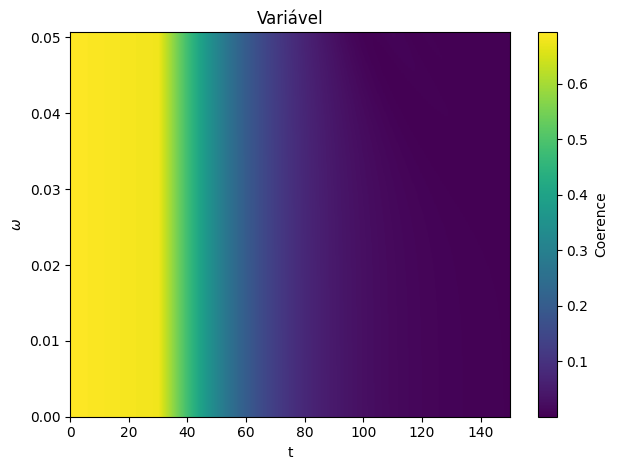

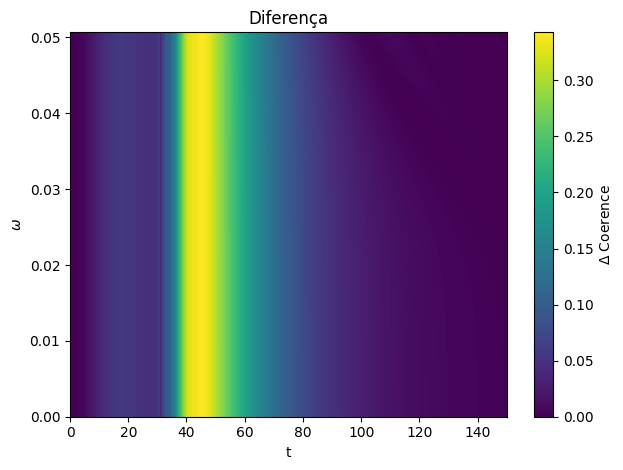

In [3]:
w_list, C_wt, D_wt, const, t = load_coerece('exp1')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

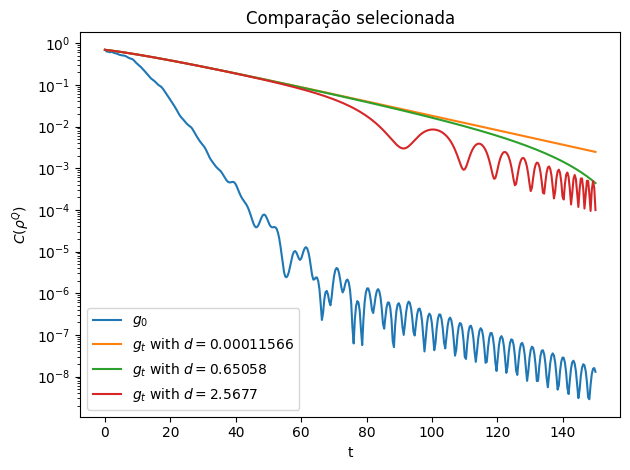

In [4]:
indices = [1, len(w_list)//2, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## exp4

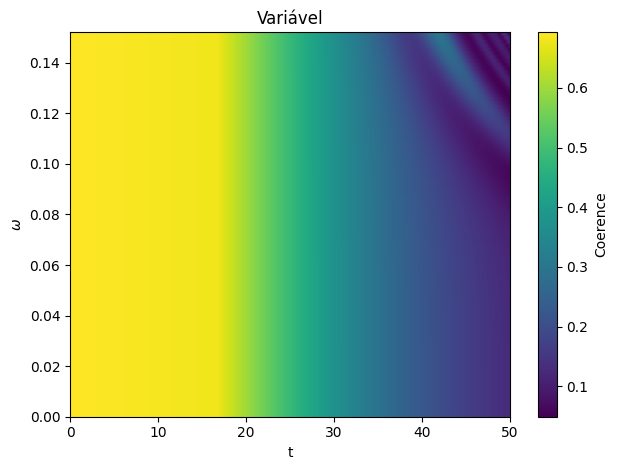

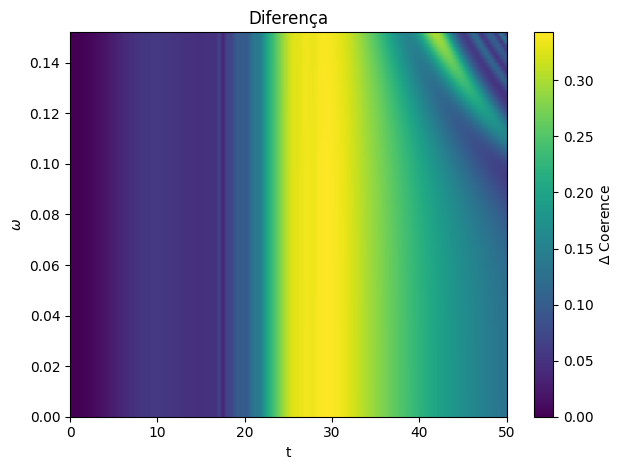

In [5]:
w_list, C_wt, D_wt, const, t = load_coerece('exp4')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

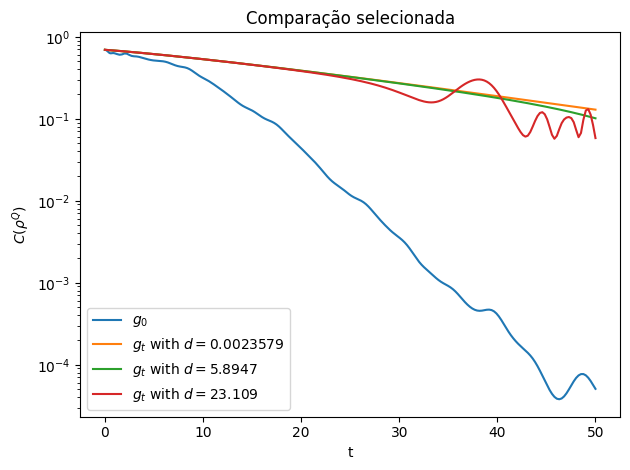

In [6]:
indices = [1, len(w_list)//2, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


Para os plots, escolhi três valores de acoplamento no instante inicial: (i) decaimentos mais rápidos que as variações de $\omega$, (ii) decaimentos $\approx \omega$, (iii) variação de $\omega$ mais rápida do que os decaimentos. Para encontrar esses valores, usei o seguinte critério (d):

$d = \frac{\omega^2}{\kappa \gamma_{\phi}} $

## exp2

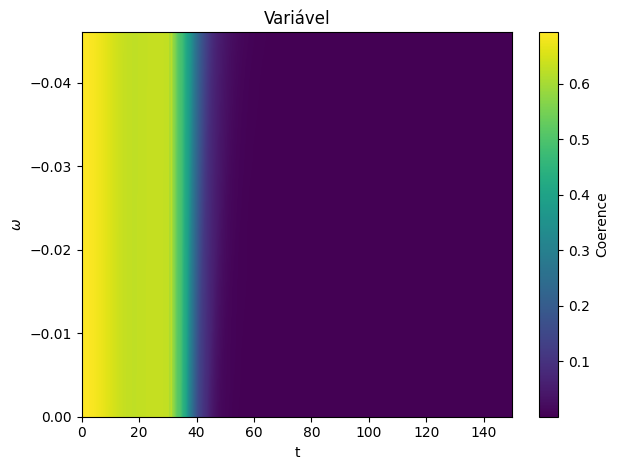

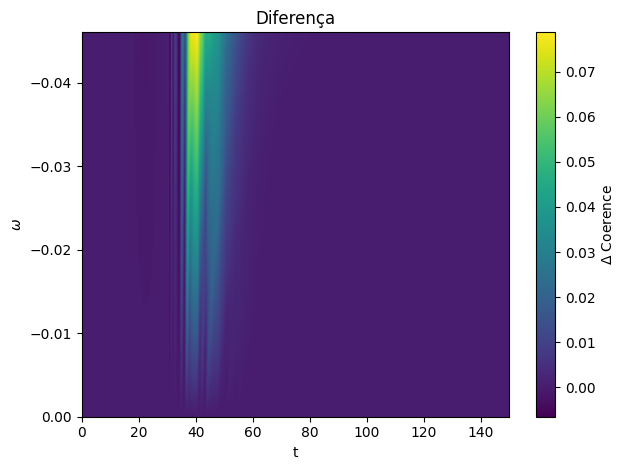

In [7]:
w_list, C_wt, D_wt, const, t = load_coerece('exp2')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

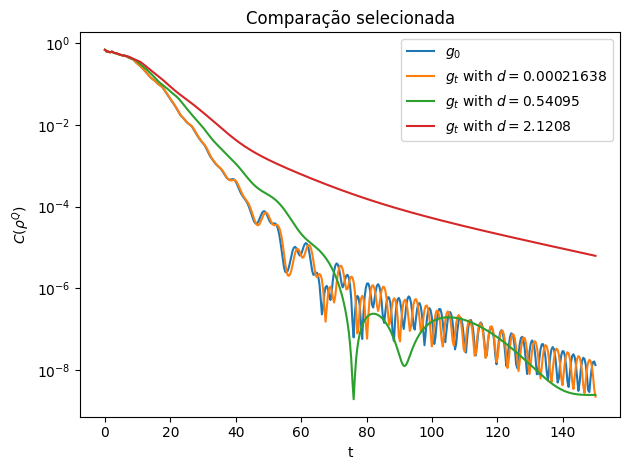

In [8]:
indices = [1, len(w_list)//2, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## exp5

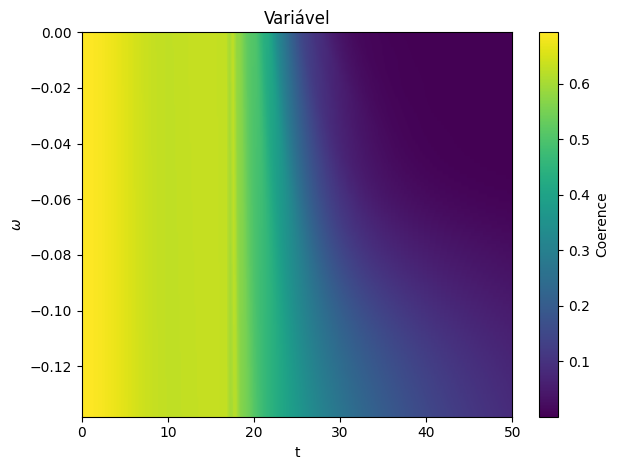

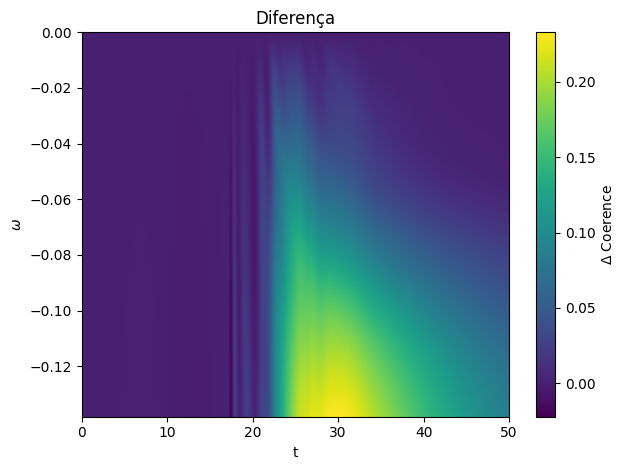

In [9]:
w_list, C_wt, D_wt, const, t = load_coerece('exp5')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

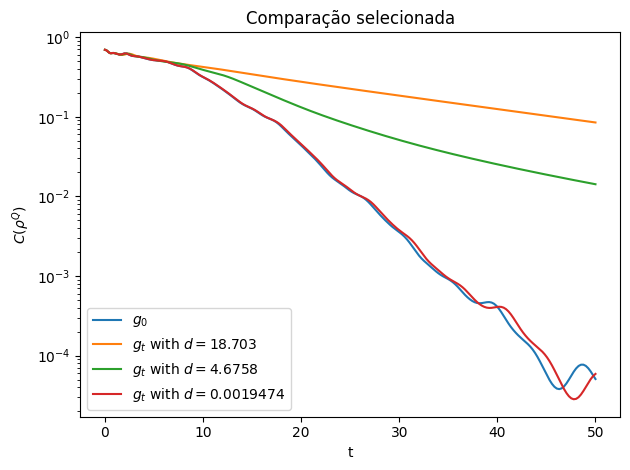

In [10]:
indices = [1, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## exp3

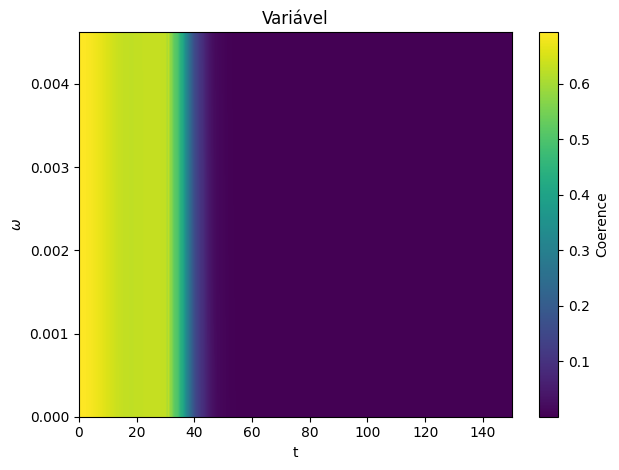

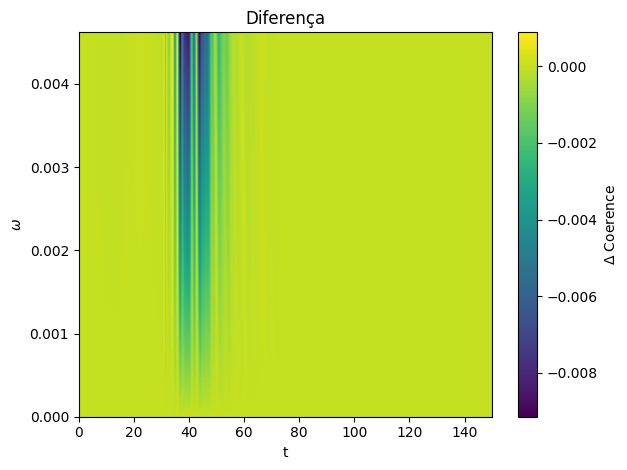

In [11]:
w_list, C_wt, D_wt, const, t = load_coerece('exp3')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

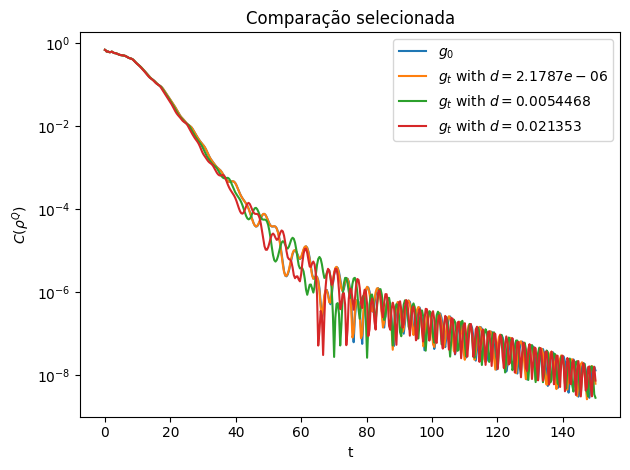

In [12]:
# Aqui aquele d não se aplica, pq sempre é muito menor omega do que os decaimentos
indices = [1, len(w_list)//2, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## exp6

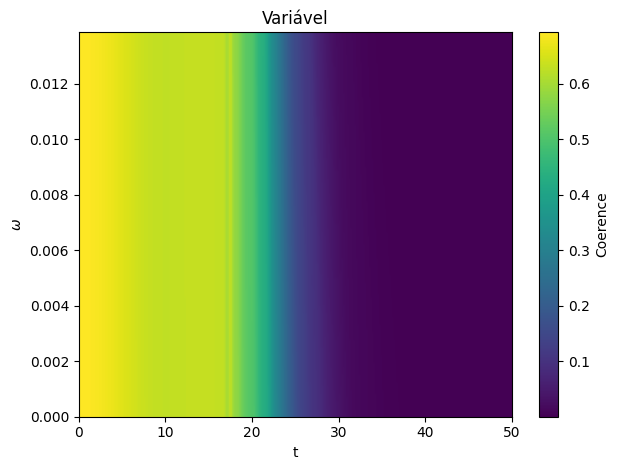

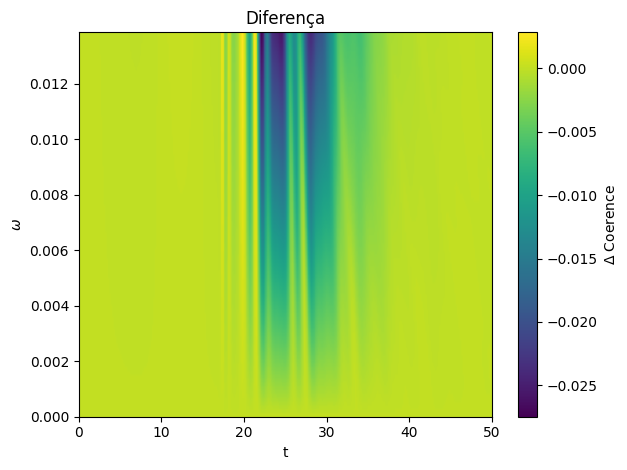

In [13]:
w_list, C_wt, D_wt, const, t = load_coerece('exp6')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

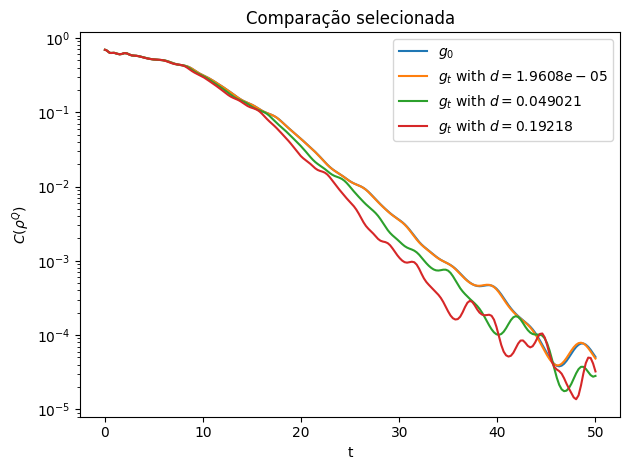

In [14]:
# Aqui aquele d não se aplica, pq sempre é muito menor omega do que os decaimentos
indices = [1, len(w_list)//2, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## linear1

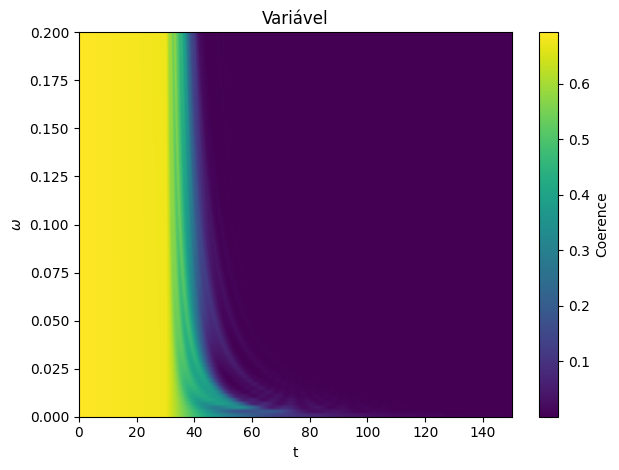

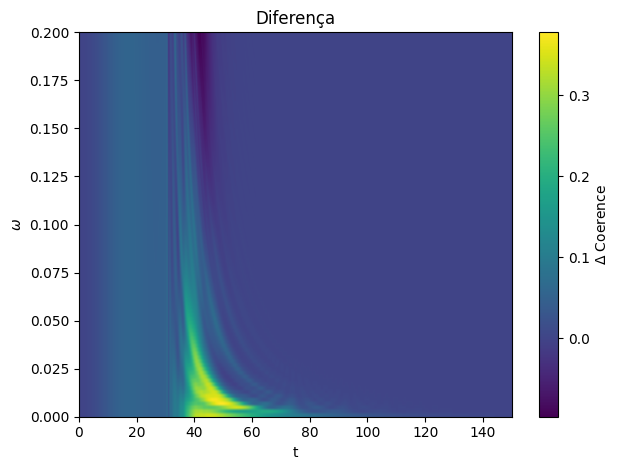

In [15]:
w_list, C_wt, D_wt, const, t = load_coerece('linear1')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

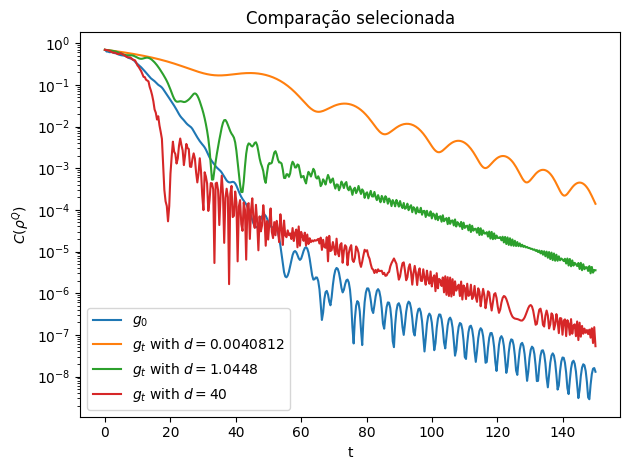

In [16]:
indices = [1, 16, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## linear4

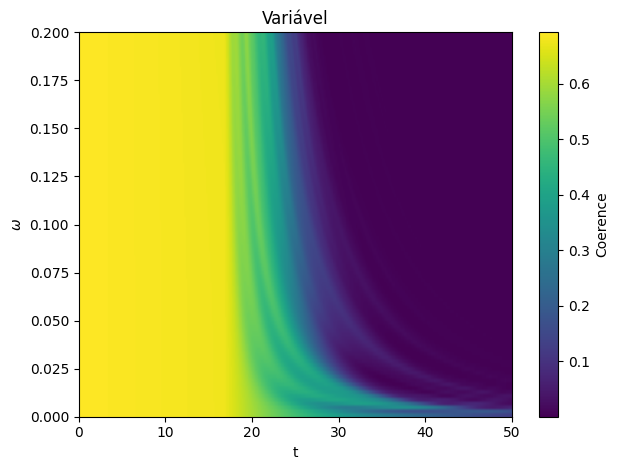

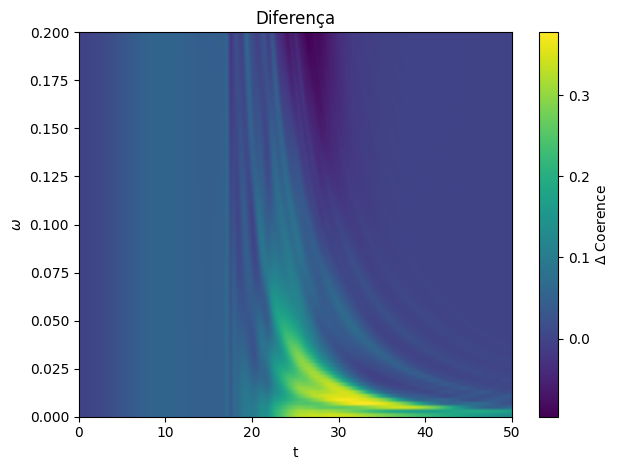

In [17]:
w_list, C_wt, D_wt, const, t = load_coerece('linear4')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

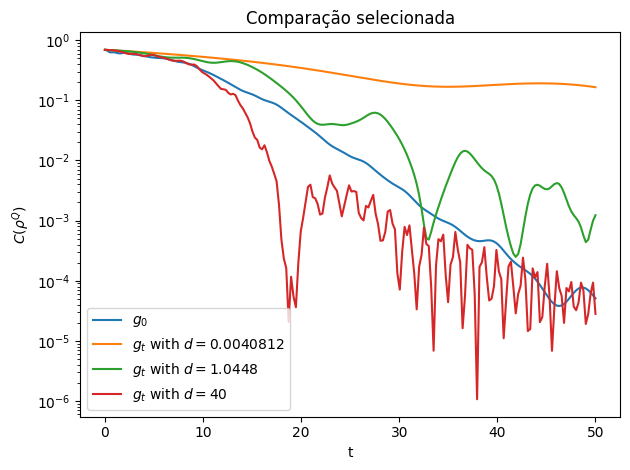

In [18]:
indices = [1, 16, -1]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## linear2      

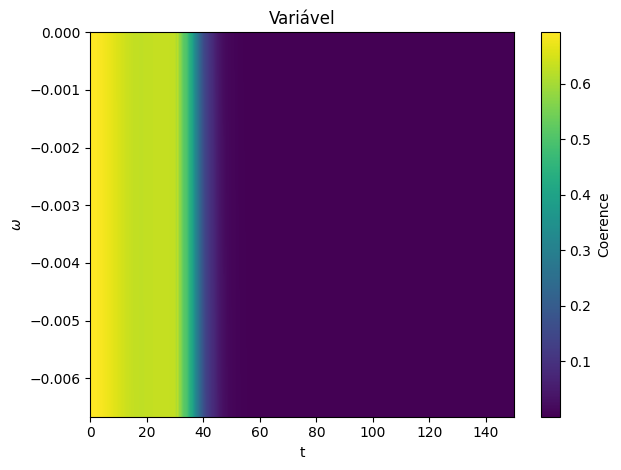

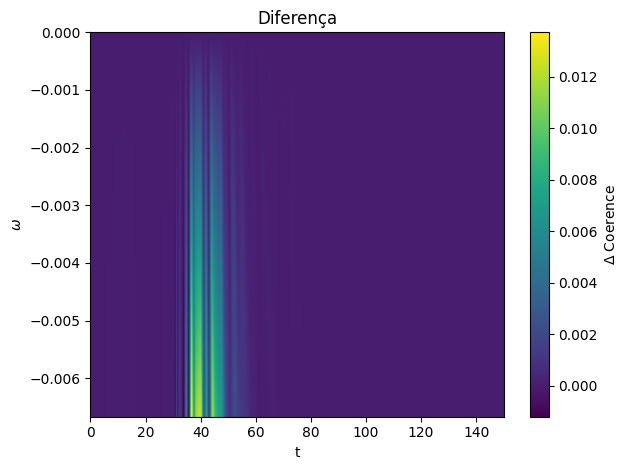

In [19]:
w_list, C_wt, D_wt, const, t = load_coerece('linear2')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

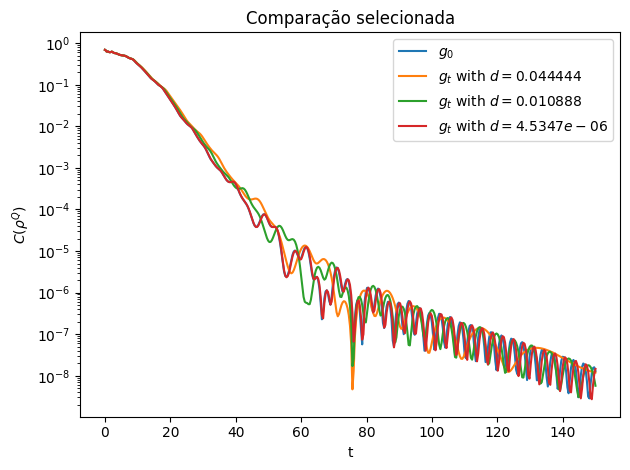

In [20]:
# Aqui aquele d não se aplica, pq sempre é muito menor omega do que os decaimentos
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## linear5

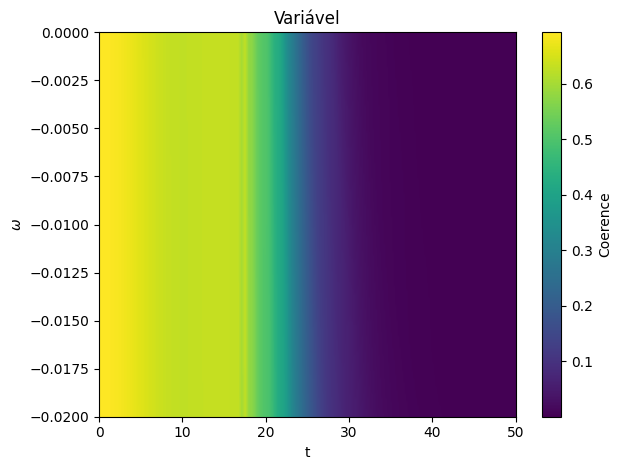

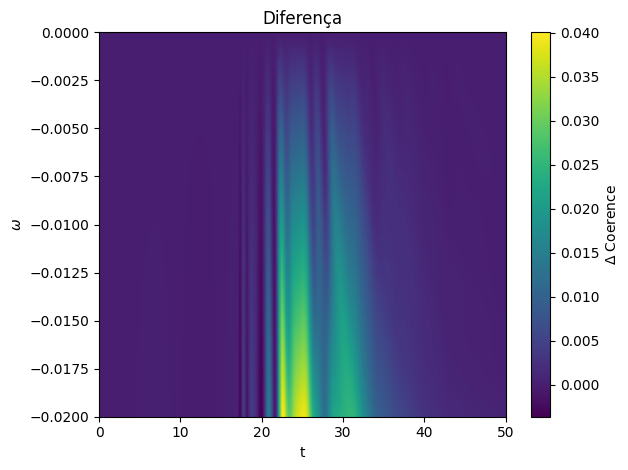

In [21]:
w_list, C_wt, D_wt, const, t = load_coerece('linear5')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

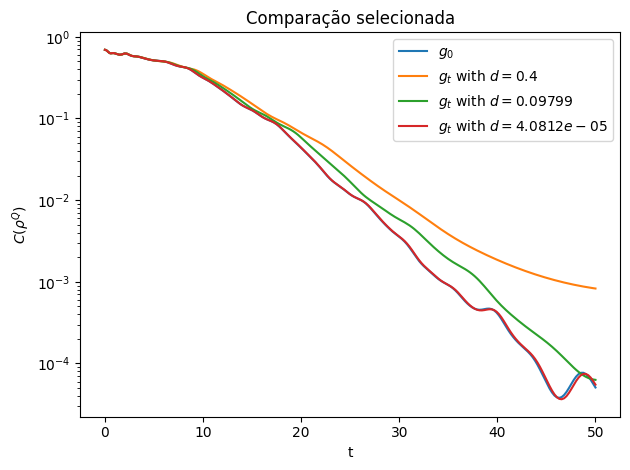

In [22]:
# Aqui aquele d não se aplica, pq sempre é muito menor omega do que os decaimentos
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## linear3

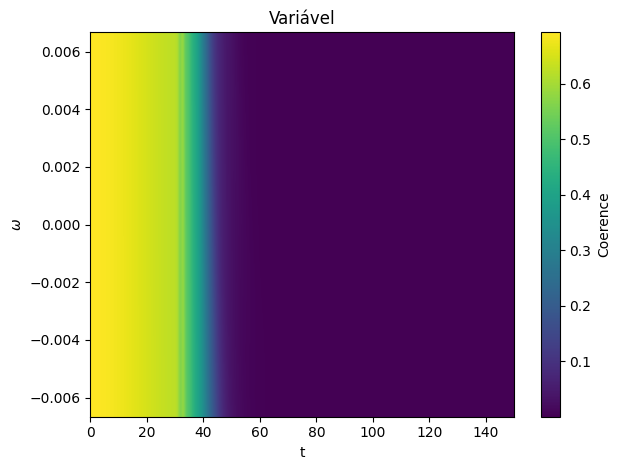

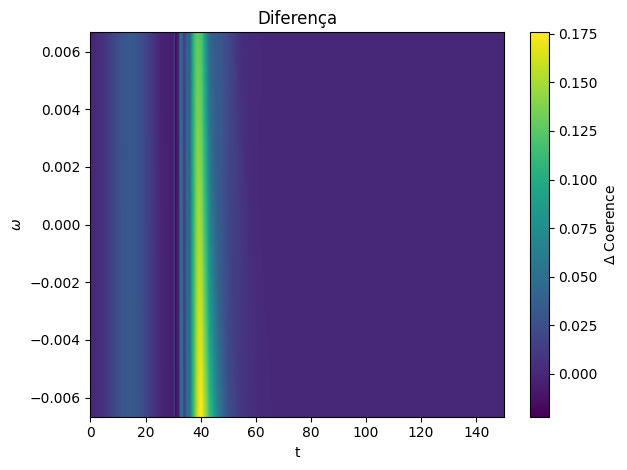

In [23]:
w_list, C_wt, D_wt, const, t = load_coerece('linear3')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

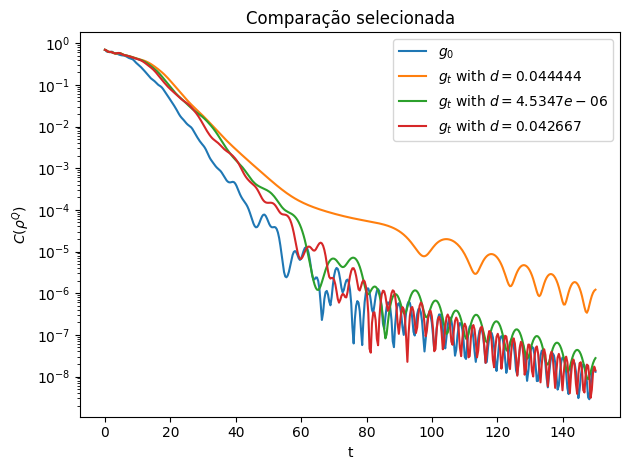

In [24]:
# Aqui aquele d não se aplica, pq sempre é muito menor omega do que os decaimentos
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## linear6

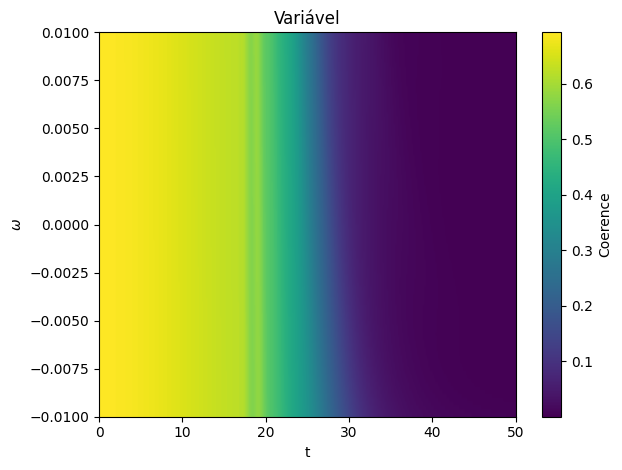

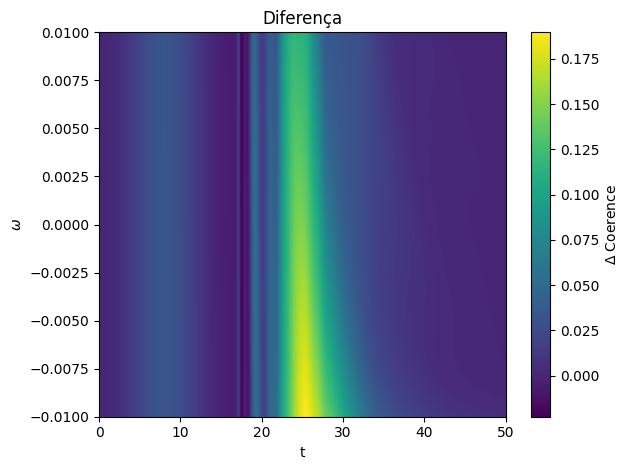

In [25]:
w_list, C_wt, D_wt, const, t = load_coerece('linear6')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt
)

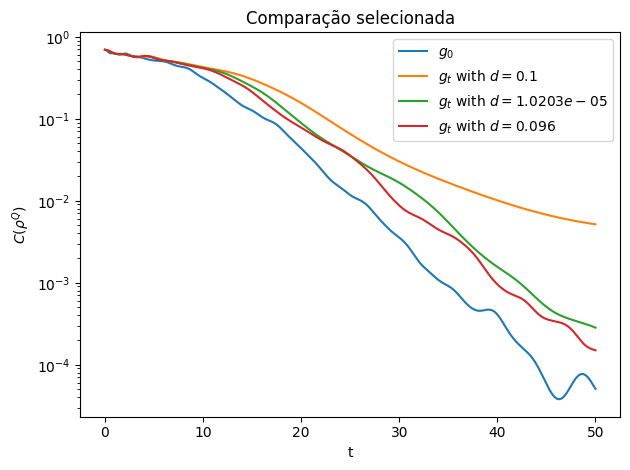

In [26]:
# Aqui aquele d não se aplica, pq sempre é muito menor omega do que os decaimentos
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices
)


## gauss1

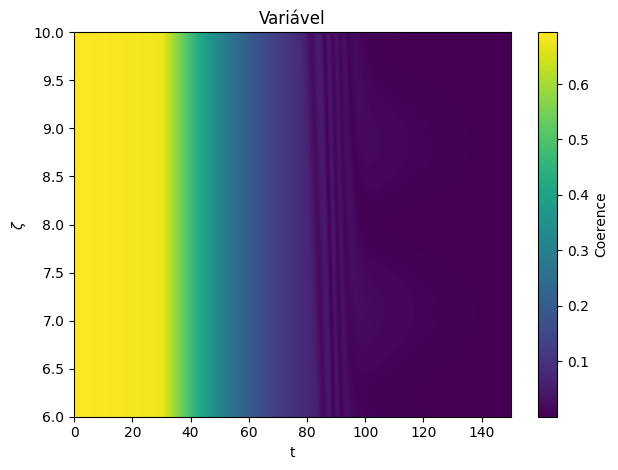

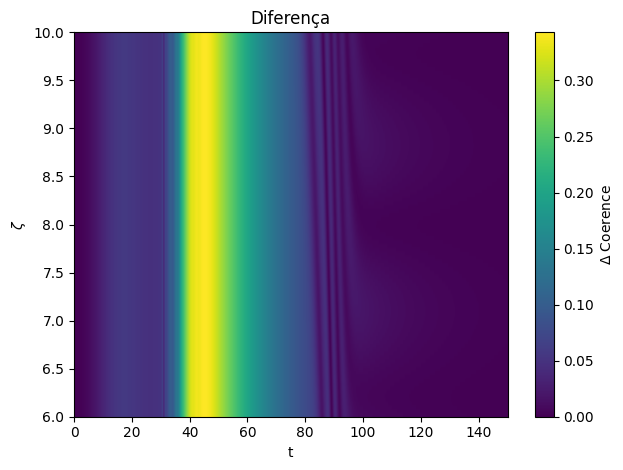

In [27]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss1')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss1'
)

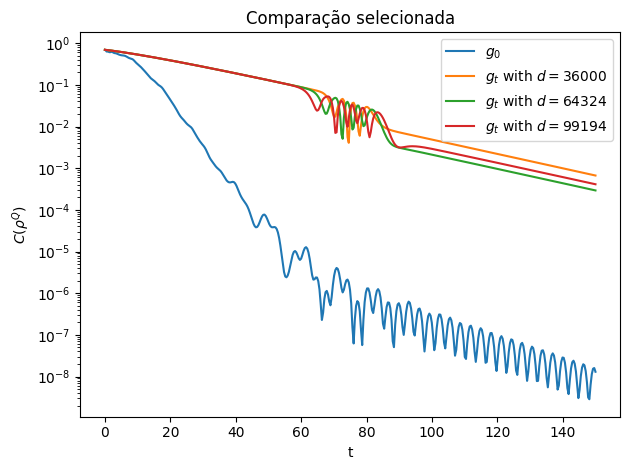

In [28]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
)


## gauss4

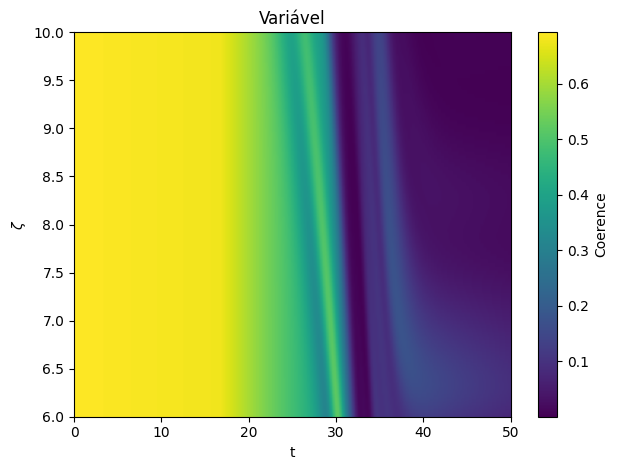

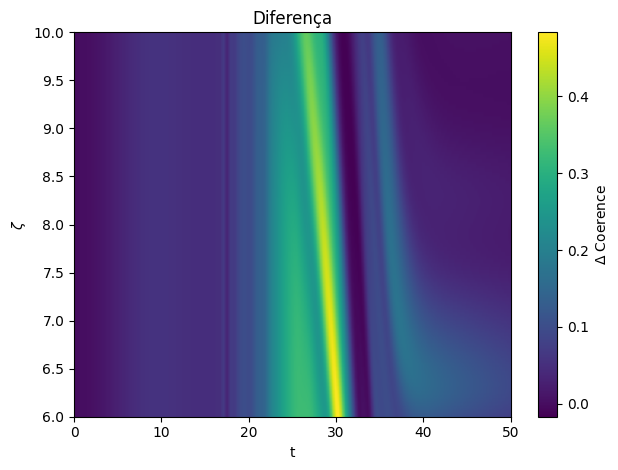

In [29]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss4')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss1'
)

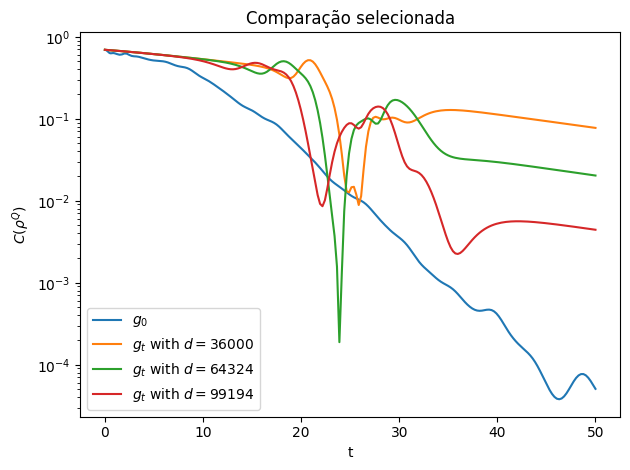

In [30]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
)


## gauss2

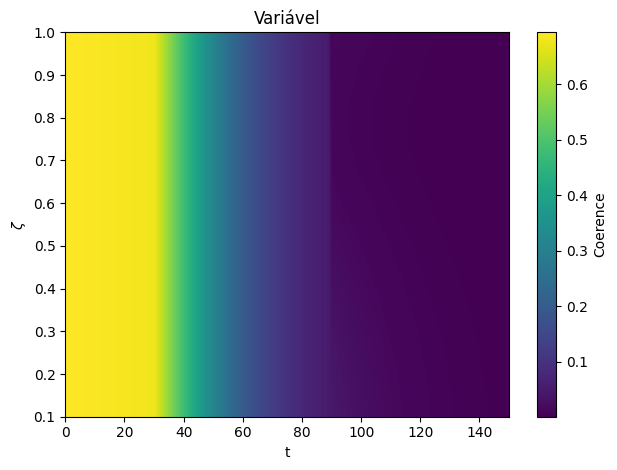

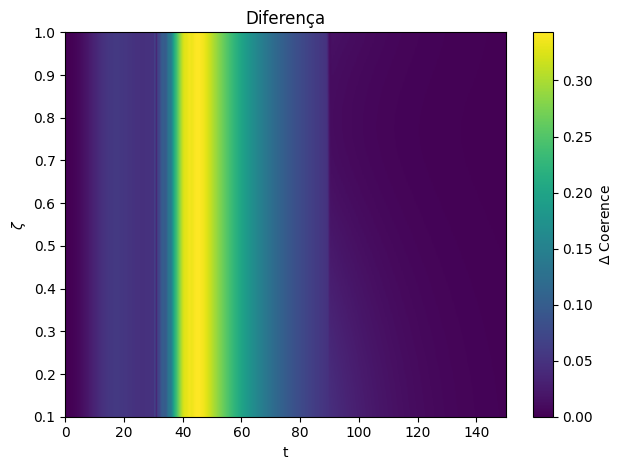

In [31]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss2')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss2'
)

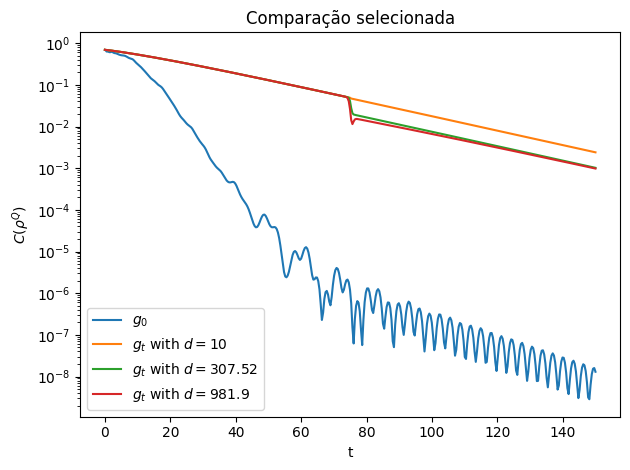

In [32]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
    
)


## gauss5

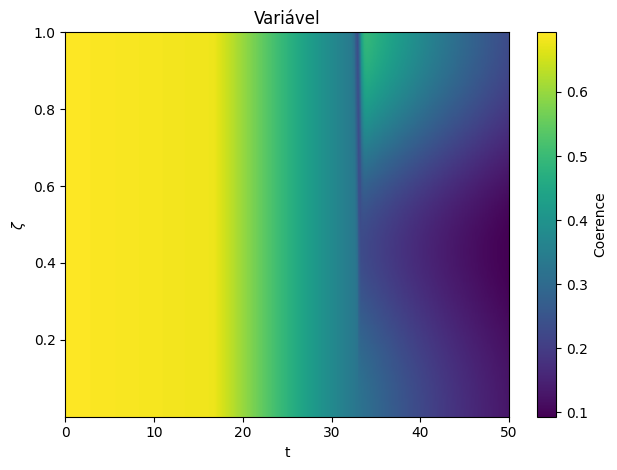

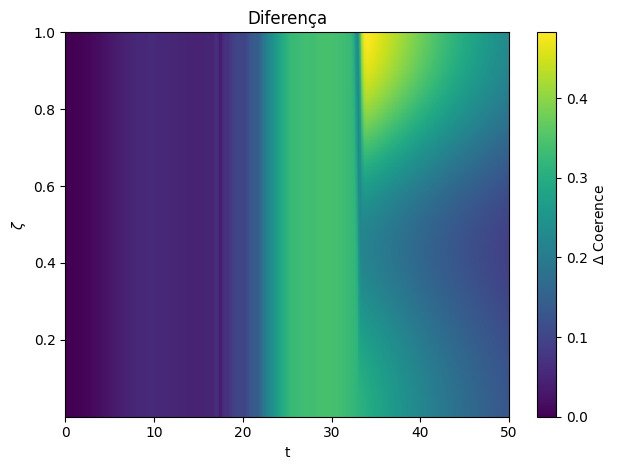

In [33]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss5')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss2'
)

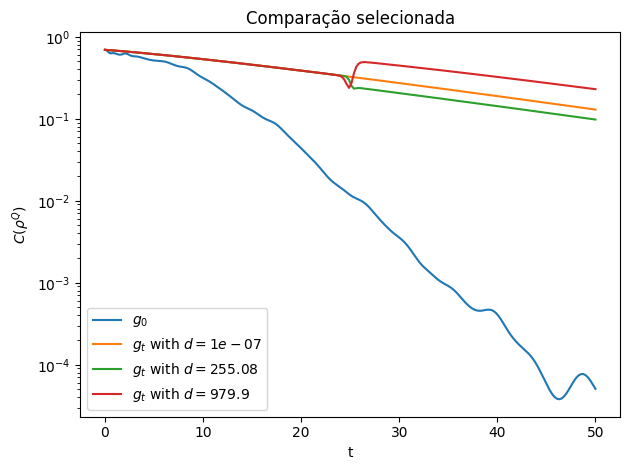

In [34]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
    
)


## gauss3

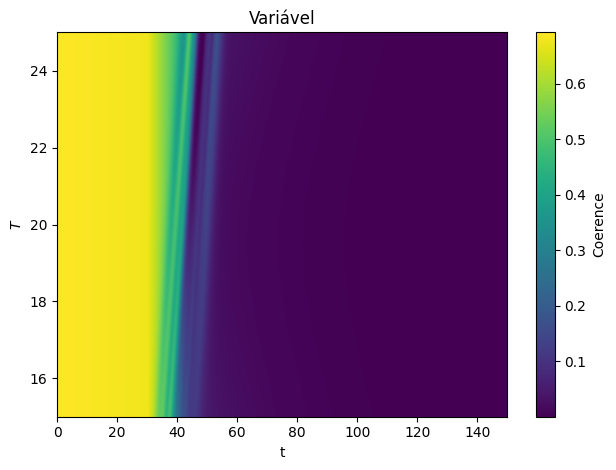

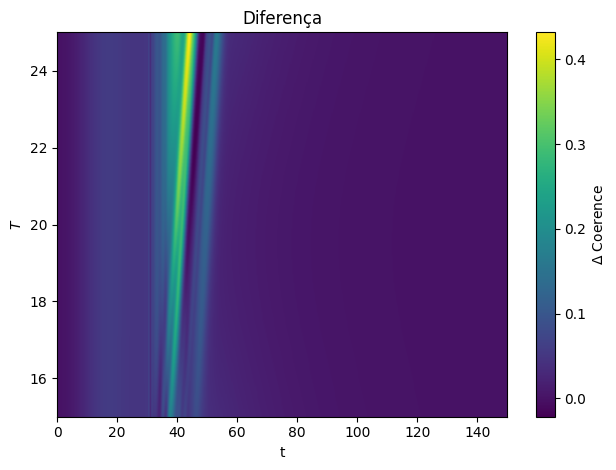

In [35]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss3')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss3'
)

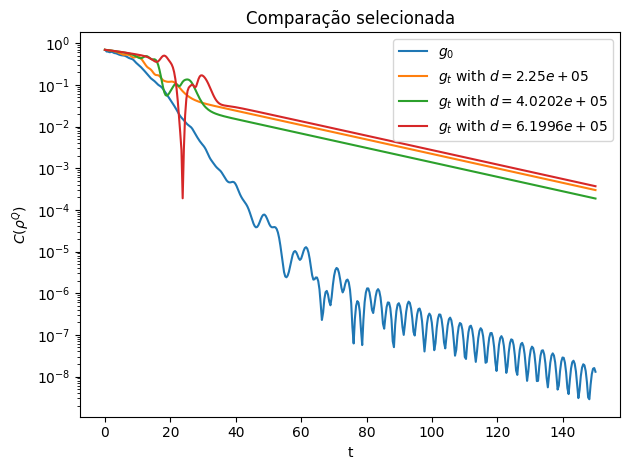

In [36]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
    
)


## gauss6

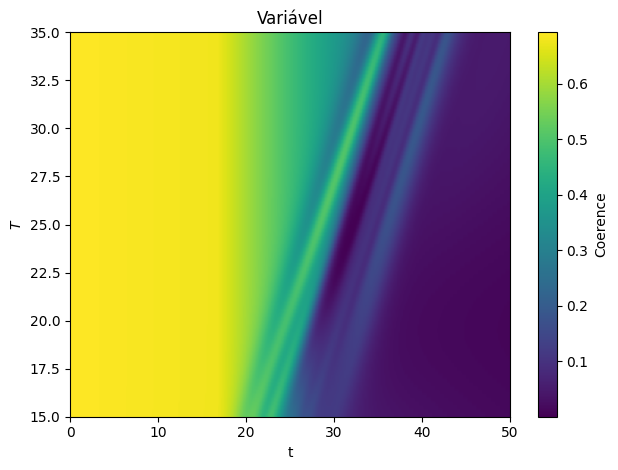

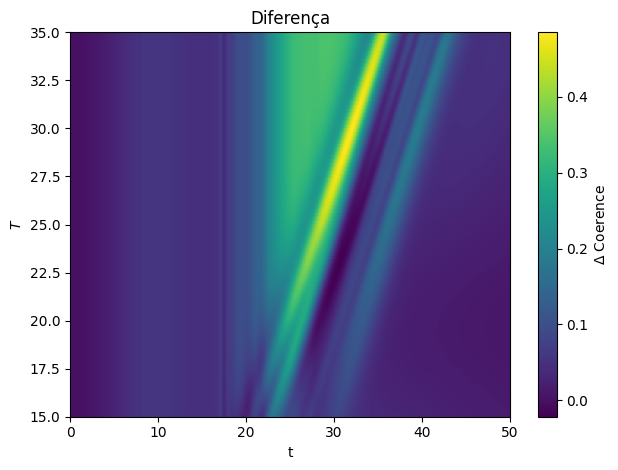

In [37]:
w_list, C_wt, D_wt, const, t = load_coerece('gauss6')

plot_coherence_and_difference(
    t=t,
    list=w_list,
    C_wt=C_wt,
    D_wt=D_wt,
    experiment='gauss6'
)

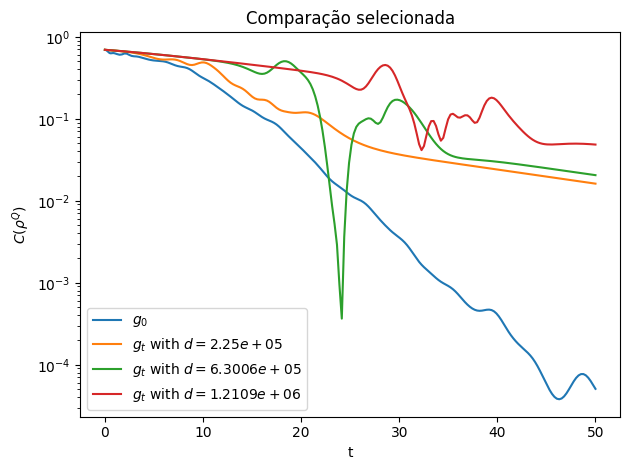

In [38]:
# Aqui não sei como ver essa variação, então só vou plotar primeiro, meio e ultimo. ignore o d no gráfico
indices = [0, len(w_list)//2, -2]

plot_selected_coherences(
    t=t,
    const=const,
    C_wt=C_wt,
    list=w_list,
    indices=indices,
    
)
